# 🌬️ Dataset with wind

When working with wind data, I often find myself computing the wind speed and direction from the U and V components. I wrote the Herbie `with_wind()` xarray accessor to quickly compute these quantities and include them in your xarray Dataset.

Consistent with the [eccodes GRIB parameter database](https://codes.ecmwf.int/grib/param-db/), variables names are assigned as follows:

- `si10`   : 10 metre wind speed (note this is _not_ `ws10` as you might expect)
- `wdir10` : 10 metre wind direction
- `ws`     : wind speed
- `wdir`   : wind direction

In [1]:
from herbie import Herbie

### Dataset with both wind speed and direction

In [2]:
ds = Herbie("2024-01-01").xarray("GRD:10 m above")
ds = ds.herbie.with_wind()
ds

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 61MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2024-01-01
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    u10                  (y, x) float32 8MB -3.636 -3.636 -3.573 ... 9.552 9.552
    v10                  (y, x) float32 8MB -2.131 -2.193 ... -2.381 -2.006
    si10                 (y, x) float32 8MB 4.214 4.246 4.193 ... 9.844 9.76
    wdir10               (y, x) float32 8MB 59.63 58.9 58.46 ... 284.0 281.9
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20240101/subset_6bef391...
    search:                  GRD:10 m above

### Only include wind speed

In [3]:
ds = Herbie("2024-01-01").xarray("GRD:.* mb")
ds = ds.herbie.with_wind("speed")
ds

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 191MB
Dimensions:              (isobaricInhPa: 7, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01
    step                 timedelta64[ns] 8B 00:00:00
  * isobaricInhPa        (isobaricInhPa) float64 56B 1e+03 925.0 ... 300.0 250.0
    latitude             (y, x) float64 15MB 21.14 21.15 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2024-01-01
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    u                    (isobaricInhPa, y, x) float32 53MB -3.676 ... 25.36
    v                    (isobaricInhPa, y, x) float32 53MB -2.176 ... 6.523
    ws                   (isobaricInhPa, y, x) float32 53MB 4.272 ... 26.18
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /home/blaylock/data/hrrr/20240101/subset_6befab7...
    search:                  GRD:.* mb

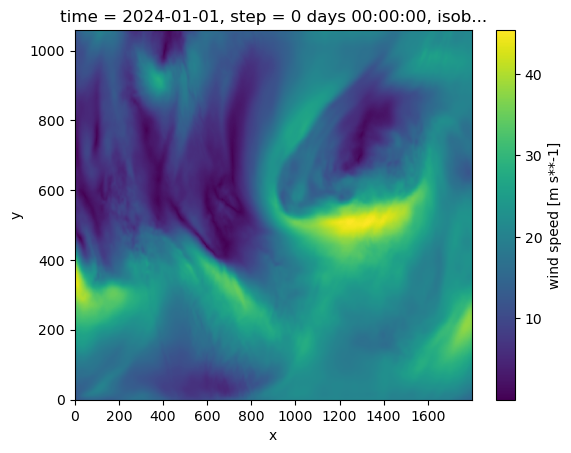

In [4]:
ds.ws.sel(isobaricInhPa=500).plot()

### GFS wind direction 300 hPa

In [5]:
ds = Herbie("2024-01-01", model="GFS").xarray("GRD:500 mb")
ds = ds.herbie.with_wind("direction")
ds

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 12MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time           datetime64[ns] 8B 2024-01-01
    gribfile_projection  object 8B None
Data variables:
    u                    (latitude, longitude) float32 4MB 3.755 3.755 ... 5.005
    v                    (latitude, longitude) float32 4MB -0.1128 ... 6.267
    wdir                 (latitude, longitude) float32 4MB 271.7 271.9 ... 218.6
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gfs
    product:                 pgrb2.0p25
    description:             Global Forecast System
    remote_grib:             https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20...
    local_grib:              /home/blaylock/data/gfs/20240101/subset_6bef0f2c...
    search:                  GRD:500 mb

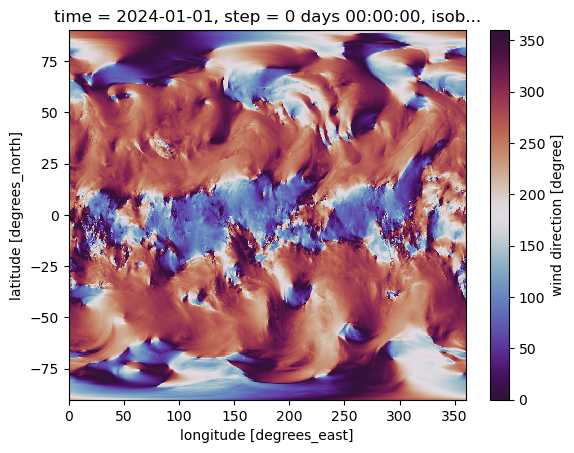

In [7]:
ds.wdir.plot(cmap="twilight_shifted", vmax=360, vmin=0)

In [8]:
ds = Herbie("2024-01-01").xarray("GRD:10 m above").herbie.with_wind()

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [ ]:
len(ds)